# Linear Regression

## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

**The company wants to know:**

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

**What do we need to do**:
- Create a linear model that describes the effect of various factors on the demand for these shared bikes
- The model should be interpretable so that the management understands it

## Steps followed

Below is the high level approach taken and the steps followed to solve this assignment

1. [Reading and Understanding the Data](#Data_Import)
2. [Cleaning the Data](#Data_Cleaning)
3. [Visualising the Data](#Data_Visualization)
4. [Data Preparation / Pre-processing Steps](#Data_Preparation)
5. [Splitting the data into training & test sets](#splitting-the-data)
6. [Rescaling features](#rescaling-features)
7. [Feature Selection](#feature-selection)
8. [Model Bulding](#model-building)
9. [Residual Analysis](#residual-analysis)
10. [Evaluating the model on test data](#model-evaluation)
    - [Calculating R-Squared Metrics](#r-sq-metrics)

<a id='Data_Import'> </a>
## Step 1: Reading and Understanding the Data

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data from csv file
bikedata = pd.read_csv('day.csv')
bikedata.shape

(730, 16)

In [3]:
# Previewing the data to see if the data is loaded properly
bikedata.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
# Verifying the data to see data types of it and if it has any null values
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Seems none of the columns have missing / null values

In [5]:
#Observing unique value counts for instant column as it seems to be a row identifier
bikedata.instant.nunique()

730

**Below are our initial high level observations:**
- `Instant` seems to be unique identifier for each record similar to index and we may not need it
- Since year and month are already captured in `yr` and `mnth` columns, `dteday` column might be redundant.
- Columns `casual` and `registered` 
    - They seem to be the classification of the target variable `cnt` in terms of registered users vs casual users.
    - Even the data dictionary mentions the same.
    - So they are actually not independent variables / features of the dataset and can be removed as we are only proceeding with `cnt` as our target variable.

In [6]:
# Inspecting the data of numerical columns
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Observing the unique values of the below columns as they seem to be numerical representation of categorical variables as per data dictionary
print('Unique values in season column:', set(bikedata.season))
print('Unique values in yr column:', set(bikedata.yr))
print('Unique values in mnth column:', set(bikedata.mnth))
print('Unique values in holiday column:', set(bikedata.holiday))
print('Unique values in weekday column:', set(bikedata.weekday))
print('Unique values in workingday column:', set(bikedata.workingday))
print('Unique values in weathersit column:', set(bikedata.weathersit))

Unique values in season column: {1, 2, 3, 4}
Unique values in yr column: {0, 1}
Unique values in mnth column: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Unique values in holiday column: {0, 1}
Unique values in weekday column: {0, 1, 2, 3, 4, 5, 6}
Unique values in workingday column: {0, 1}
Unique values in weathersit column: {1, 2, 3}


**High Level Observations:**
- Columns `season`, `mnth`,`weekday`,`weathersit` are un-ordered categorical variables with more than two categories. They can be converted back to categorical variables and then use one hot encoding on it so that they can be suitable for buiding model
- Columns `yr`, `holiday`, `workingday` have values of only 0 and 1. So they can be retained as is even one hot encoding will result in the same

<a id="Data_Cleaning"></a>
## Step 2: Cleaning the Data

**Below are the key steps performed in this step:**
- Dropping redundant / not required columns
- Converting the categorical variables present in numerical format and having more than two categories into their actual format

**Dropping Redundant / not required columns**

In [8]:
#pd.DataFrame.drop?
# Columns that need to be dropped
list_col_to_drop = ['instant','dteday','casual','registered']
bikedata = bikedata.drop(columns=list_col_to_drop)
print(bikedata.shape)
bikedata.head()

(730, 12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


- All the four columns `instant`,`dteday`,`casual`,`registered` got dropped now

**Mapping the categorical variables**

In [9]:
#Create mapping dictionary for each of the categorical variables as per data dictionary 
# 1. season : season (1:spring, 2:summer, 3:fall, 4:winter)
seasons_mapping = {1: "spring", 2:"summer", 3:"fall", 4:"winter"}
bikedata['season'] = bikedata['season'].map(seasons_mapping)

# 2. mnth : month ( 1 to 12)
mnth_mapping = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr",5:"May", 6:"Jun", 7:"Jul",8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
bikedata['mnth'] = bikedata['mnth'].map(mnth_mapping)

# 3. weekday : day of the week
weekday_mapping = {0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}
bikedata['weekday'] = bikedata['weekday'].map(weekday_mapping)

# 4. weathersit : 1: Clear, 2: Mist 3: Light Snow or Rain, 4: Heavy Rain
weathersit_mapping = {1:"Clear", 2:"Mist", 3:"LightSnowRain", 4:"HeavyRain"}
bikedata['weathersit'] = bikedata['weathersit'].map(weathersit_mapping)

bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


All the categorical variables having more than two categories are converted back to their format

<a id="Data_Visualization"></a>
## Step 3: Visualising the Data

Here we will try to observe the patterns among the data and determine which predictor variables have a strong association with the target variable.

Our key objectives from this are:
- Identify if there is multi-collinearity among any of the predictor variables
- Identify if we can directly observe any predictor variables having a strong association with the target variable which is demand for bikes

We will be using matplotlib and searborn for visualising the data

**Numeric Variables**

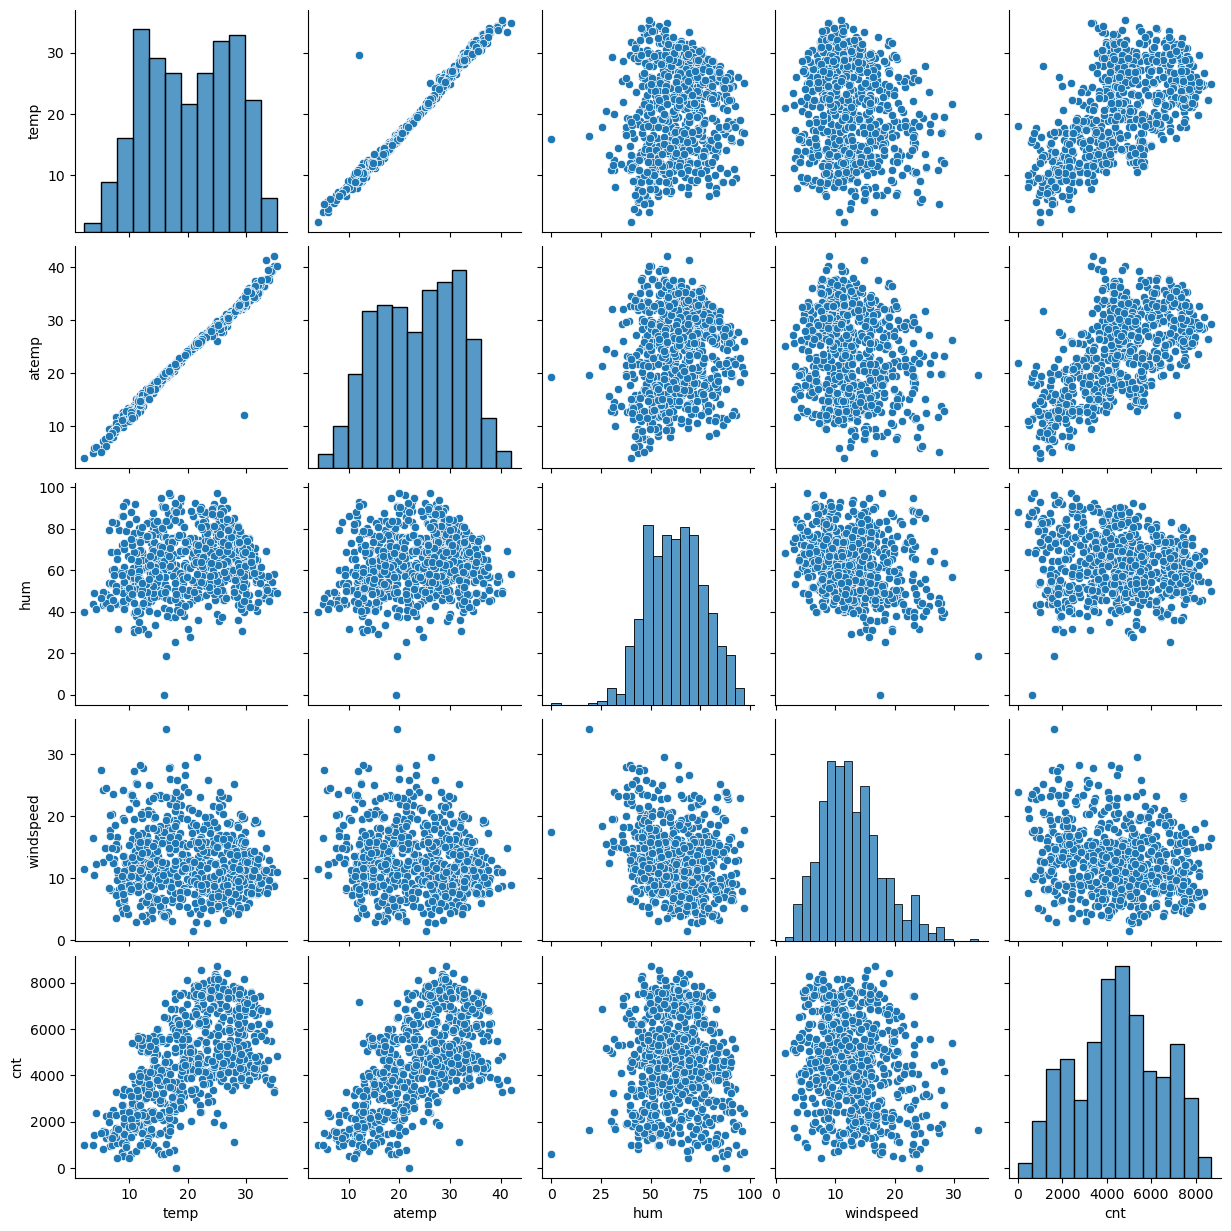

In [10]:
# Visualising numeric variables
# As we observed already there are some categorical variables which are in numerical format, so included only 
# actual numeric variables
numeric_variables = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(data=bikedata,vars=numeric_variables)
plt.show()

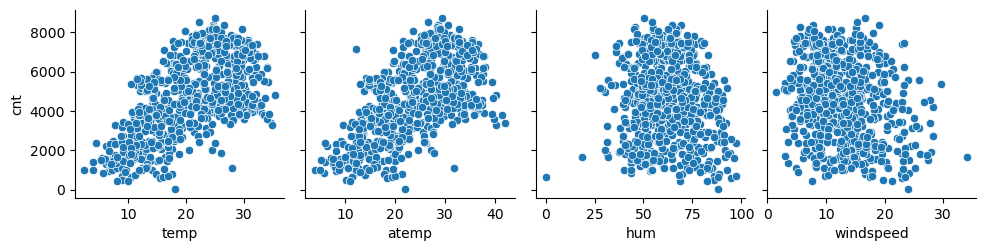

In [11]:
# Plotting a pairplot to see only relationship of the numeric predictor variables with the target variable
sns.pairplot(data=bikedata,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt')
plt.show()

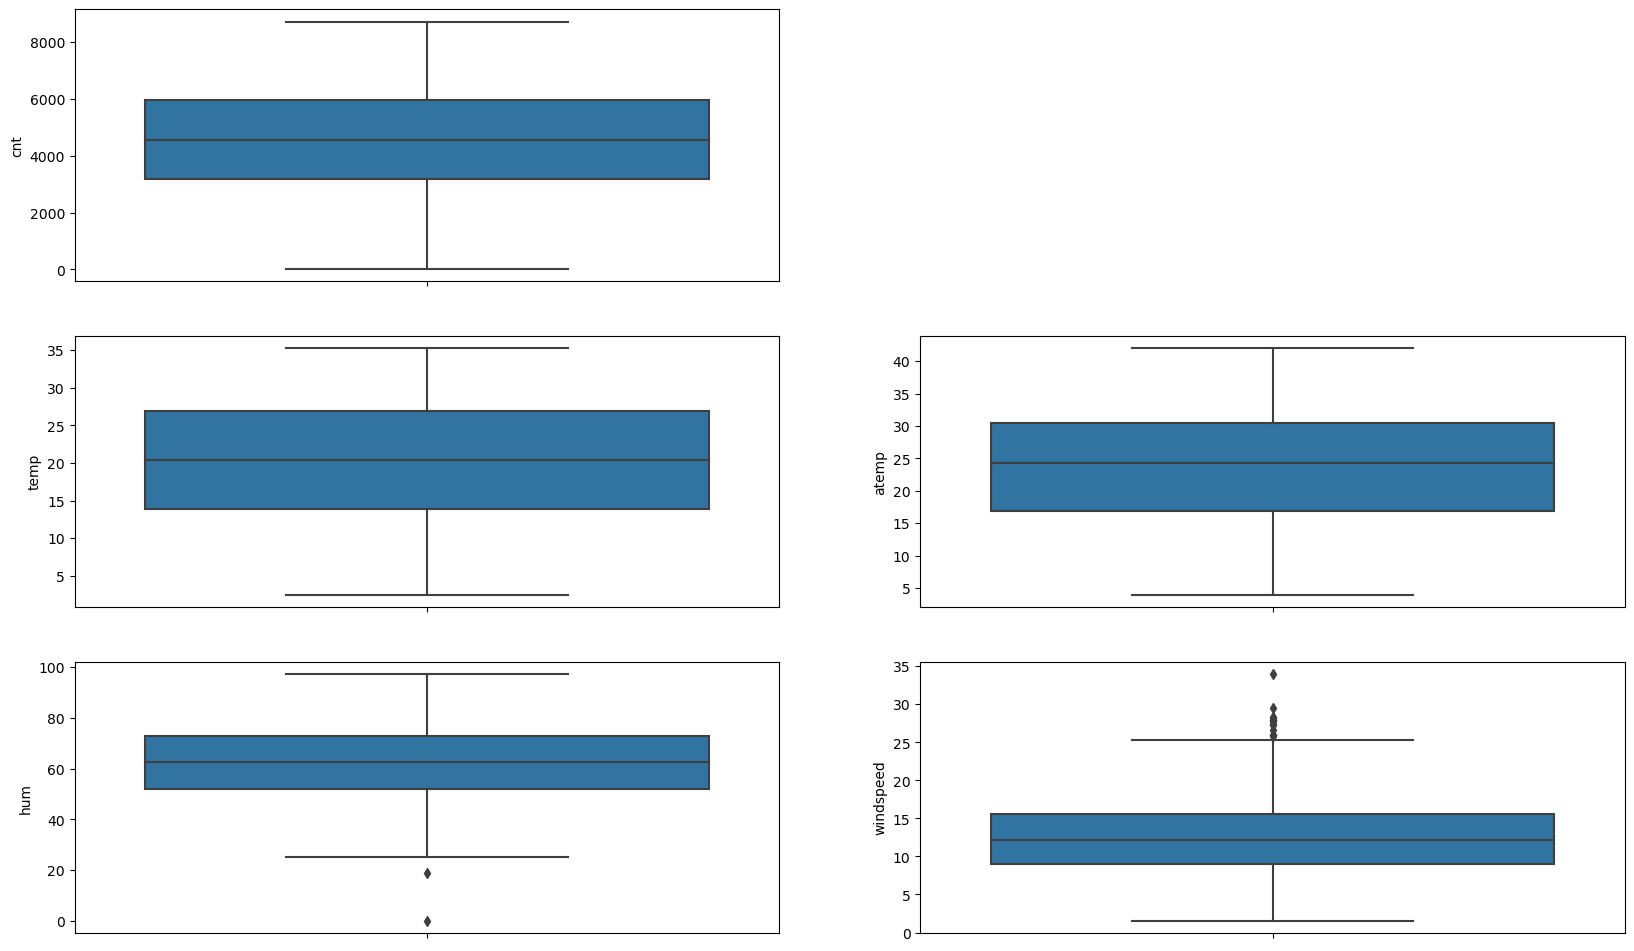

In [12]:
# Plotting a box plot for actual numerical variables to see the extent of outliers
plt.figure(figsize=(20,12))
plt.subplot(3, 2, 1)
sns.boxplot(data=bikedata, y='cnt')
plt.subplot(3, 2, 3)
sns.boxplot(data=bikedata, y='temp')
plt.subplot(3, 2, 4)
sns.boxplot(data=bikedata, y='atemp')
plt.subplot(3, 2, 5)
sns.boxplot(data=bikedata, y='hum')
plt.subplot(3, 2, 6)
sns.boxplot(data=bikedata, y='windspeed')
plt.show()

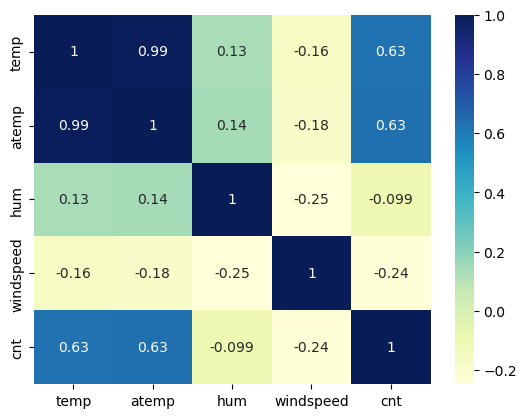

In [13]:
# Verify the correlation coefficients
sns.heatmap(data=bikedata[numeric_variables].corr(), annot=True, cmap='YlGnBu')
plt.show()

**Key Observations:**
- `temp` and `atemp` seem to be highly collinear
- `temp` and `atemp` seem to have some linear relationship with target variable `cnt` and it is good enough
- `windspeed` have few outliers at the upper fence while `hum` have few outliers at the lower fence

**Categorical Variables**

We have totally seven categorical variables namely `season`, `mnth`,`weekday`,`weathersit`,`yr`, `holiday`, `workingday`
- For `month`, plotting a line plot as it is time series data
- For remaining ones, we will plot a box plot

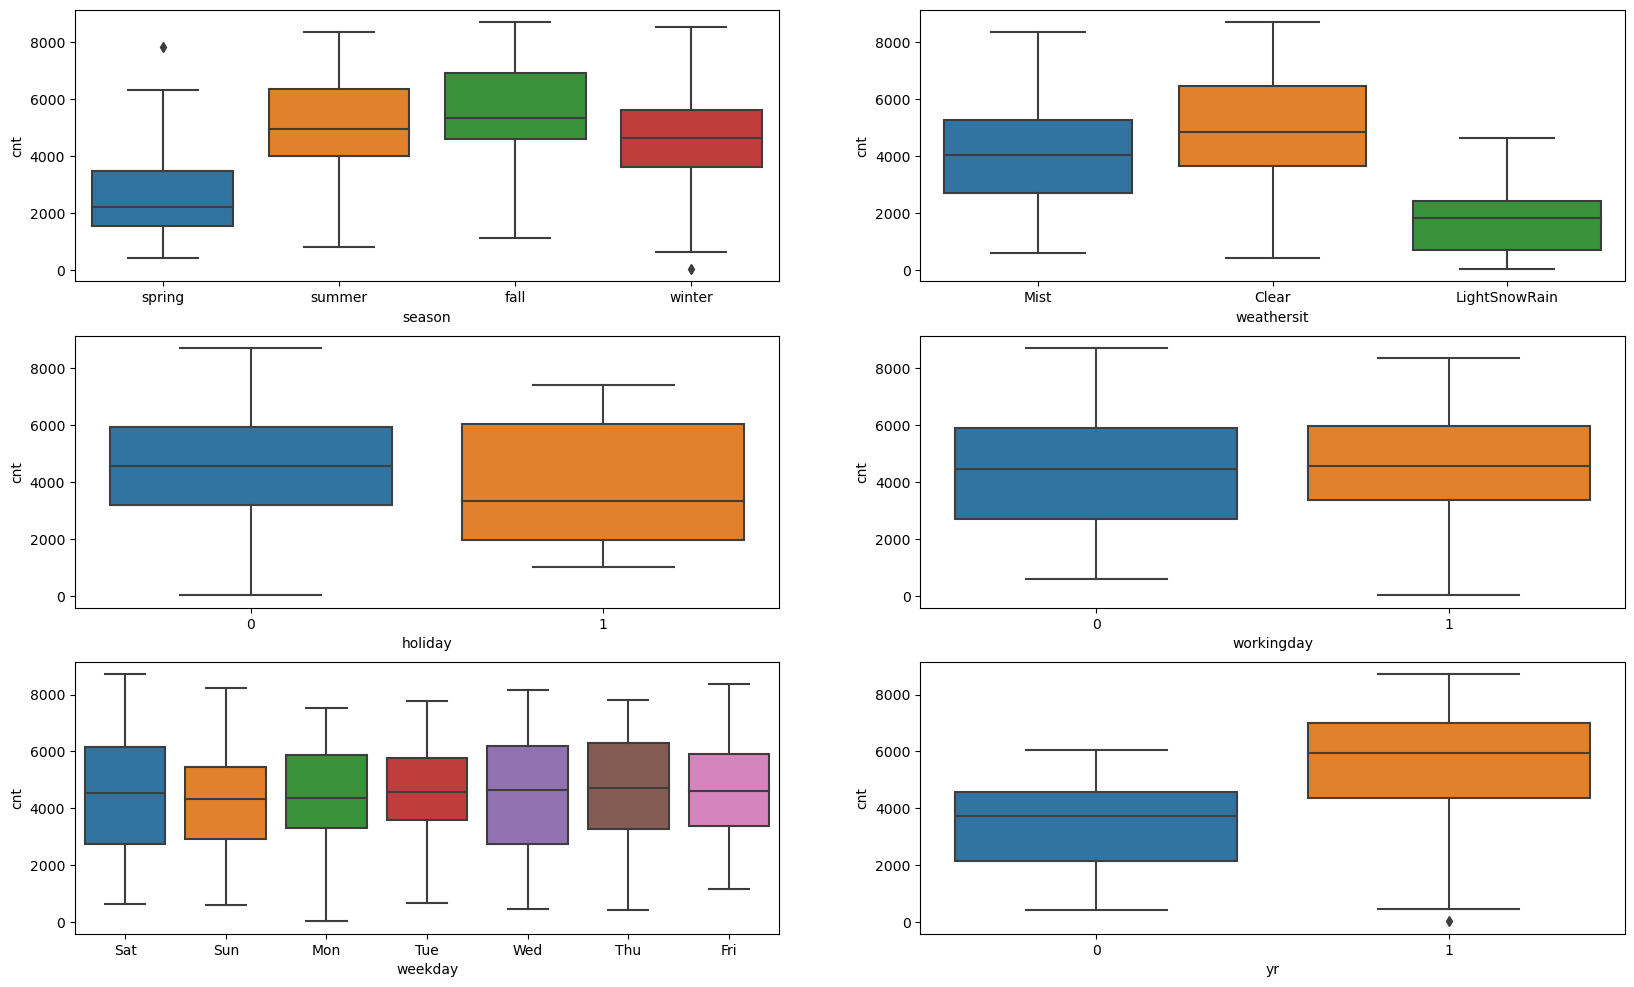

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(3, 2, 1)
sns.boxplot(data=bikedata, x='season', y='cnt')
plt.subplot(3, 2, 2)
sns.boxplot(data=bikedata, x='weathersit', y='cnt')
plt.subplot(3, 2, 3)
sns.boxplot(data=bikedata, x='holiday', y='cnt')
plt.subplot(3, 2, 4)
sns.boxplot(data=bikedata, x='workingday', y='cnt')
plt.subplot(3, 2, 5)
sns.boxplot(data=bikedata, x='weekday', y='cnt')
plt.subplot(3, 2, 6)
sns.boxplot(data=bikedata, x='yr', y='cnt')
plt.show()

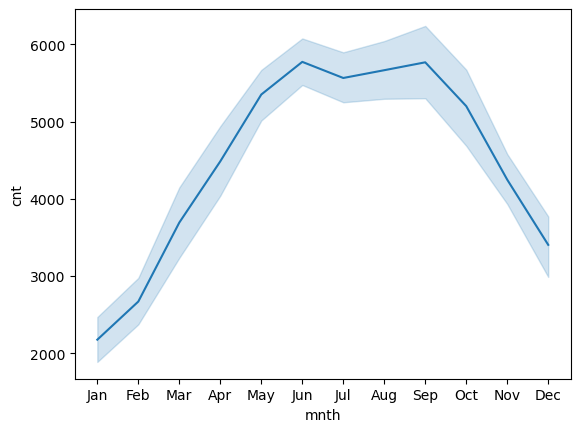

In [15]:
sns.lineplot(data=bikedata,x='mnth', y='cnt')
plt.show()

**Key Observations**
- `season` - More demand is observed in 'fall' followed by 'summer' and 'winter'. Least is observed during spring
- `weathersit` - More demand is observed when the weather is 'clear', followed by 'Mist'. Least is observed during 'Light Snow / Rain'. However there seems to be no data when the weather is extreme like 'Heavy Rain' etc. Assuming the demand is zero or close to zero in such extreme weather
- `holiday` - Median demand is actually high when it is not a holiday. On holidays, it is observed that the minimum demand can go subsequently low when compared with not a holiday.
- `workingday` - Median is almost same but the minimum demand is high in case of working days.
- `weekday` - Median is almost comparable on all the days of the week. Peak demand is observed during Saturdays and Wednesdays and Thursdays. At the same time minimum demand was also observed on Saturday, Wednesday and Sunday.
- `yr` - Year 2019 seems to have got more demand. Even the minimum of 2019 is comparable to the maximum of 2018. May be because this company got barely started in 2018.
- `mnth` - This is also in sync with season and weather conditions. Demand is more between 'May' and 'Sep' months. Demand is very less in the months of Jan, Feb and Mar months

<a id='Data_Preparation'></a>
## Step 4: Data Preparation / Pre-processing Steps

### Creating dummy variables

Since we need only numerical values to fit a straight line, all the categorical variables which are in non-numeric format are converted to 1's and 0's using one-hot encoding
Below is the list of cateogrical variables which we have to convert:
- `season`, `weathersit`, `weekday`, `mnth`

In [16]:
# Get the dummy variables for each of the above and append it to original data after dropping the first one

season_dummies = pd.get_dummies(bikedata.season, prefix='season', drop_first=True)
bikedata = pd.concat([bikedata,season_dummies], axis=1)
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [17]:
# Repeating the above for the other three categorical variables

mnth_dummies = pd.get_dummies(bikedata.mnth, prefix='mnth', drop_first=True)
weekday_dummies = pd.get_dummies(bikedata.weekday, prefix='weekday',drop_first=True)
weathersit_dummies = pd.get_dummies(bikedata.weathersit, prefix='weathersit',drop_first=True)

# Concatenating the above ones to the original data

bikedata = pd.concat([bikedata, mnth_dummies, weekday_dummies, weathersit_dummies], axis= 1)
print(bikedata.shape)
bikedata.head()

(730, 34)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnowRain,weathersit_Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


**Dropping the original categorical columns as we now have dummies**

In [18]:
# Dropping the original categorical columns
list_catcols_to_drop = ['season','mnth','weekday','weathersit']
bikedata = bikedata.drop(columns=list_catcols_to_drop)
print(bikedata.shape)
bikedata.head()

(730, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnowRain,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# Inspecting the data once
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   atemp                     730 non-null    float64
 5   hum                       730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   cnt                       730 non-null    int64  
 8   season_spring             730 non-null    uint8  
 9   season_summer             730 non-null    uint8  
 10  season_winter             730 non-null    uint8  
 11  mnth_Aug                  730 non-null    uint8  
 12  mnth_Dec                  730 non-null    uint8  
 13  mnth_Feb                  730 non-null    uint8  
 14  mnth_Jan  

All the data is now numeric and suitable for our model building

**Cross verifying correlation coefficients once among all the numeric variables before proceeding with model building**

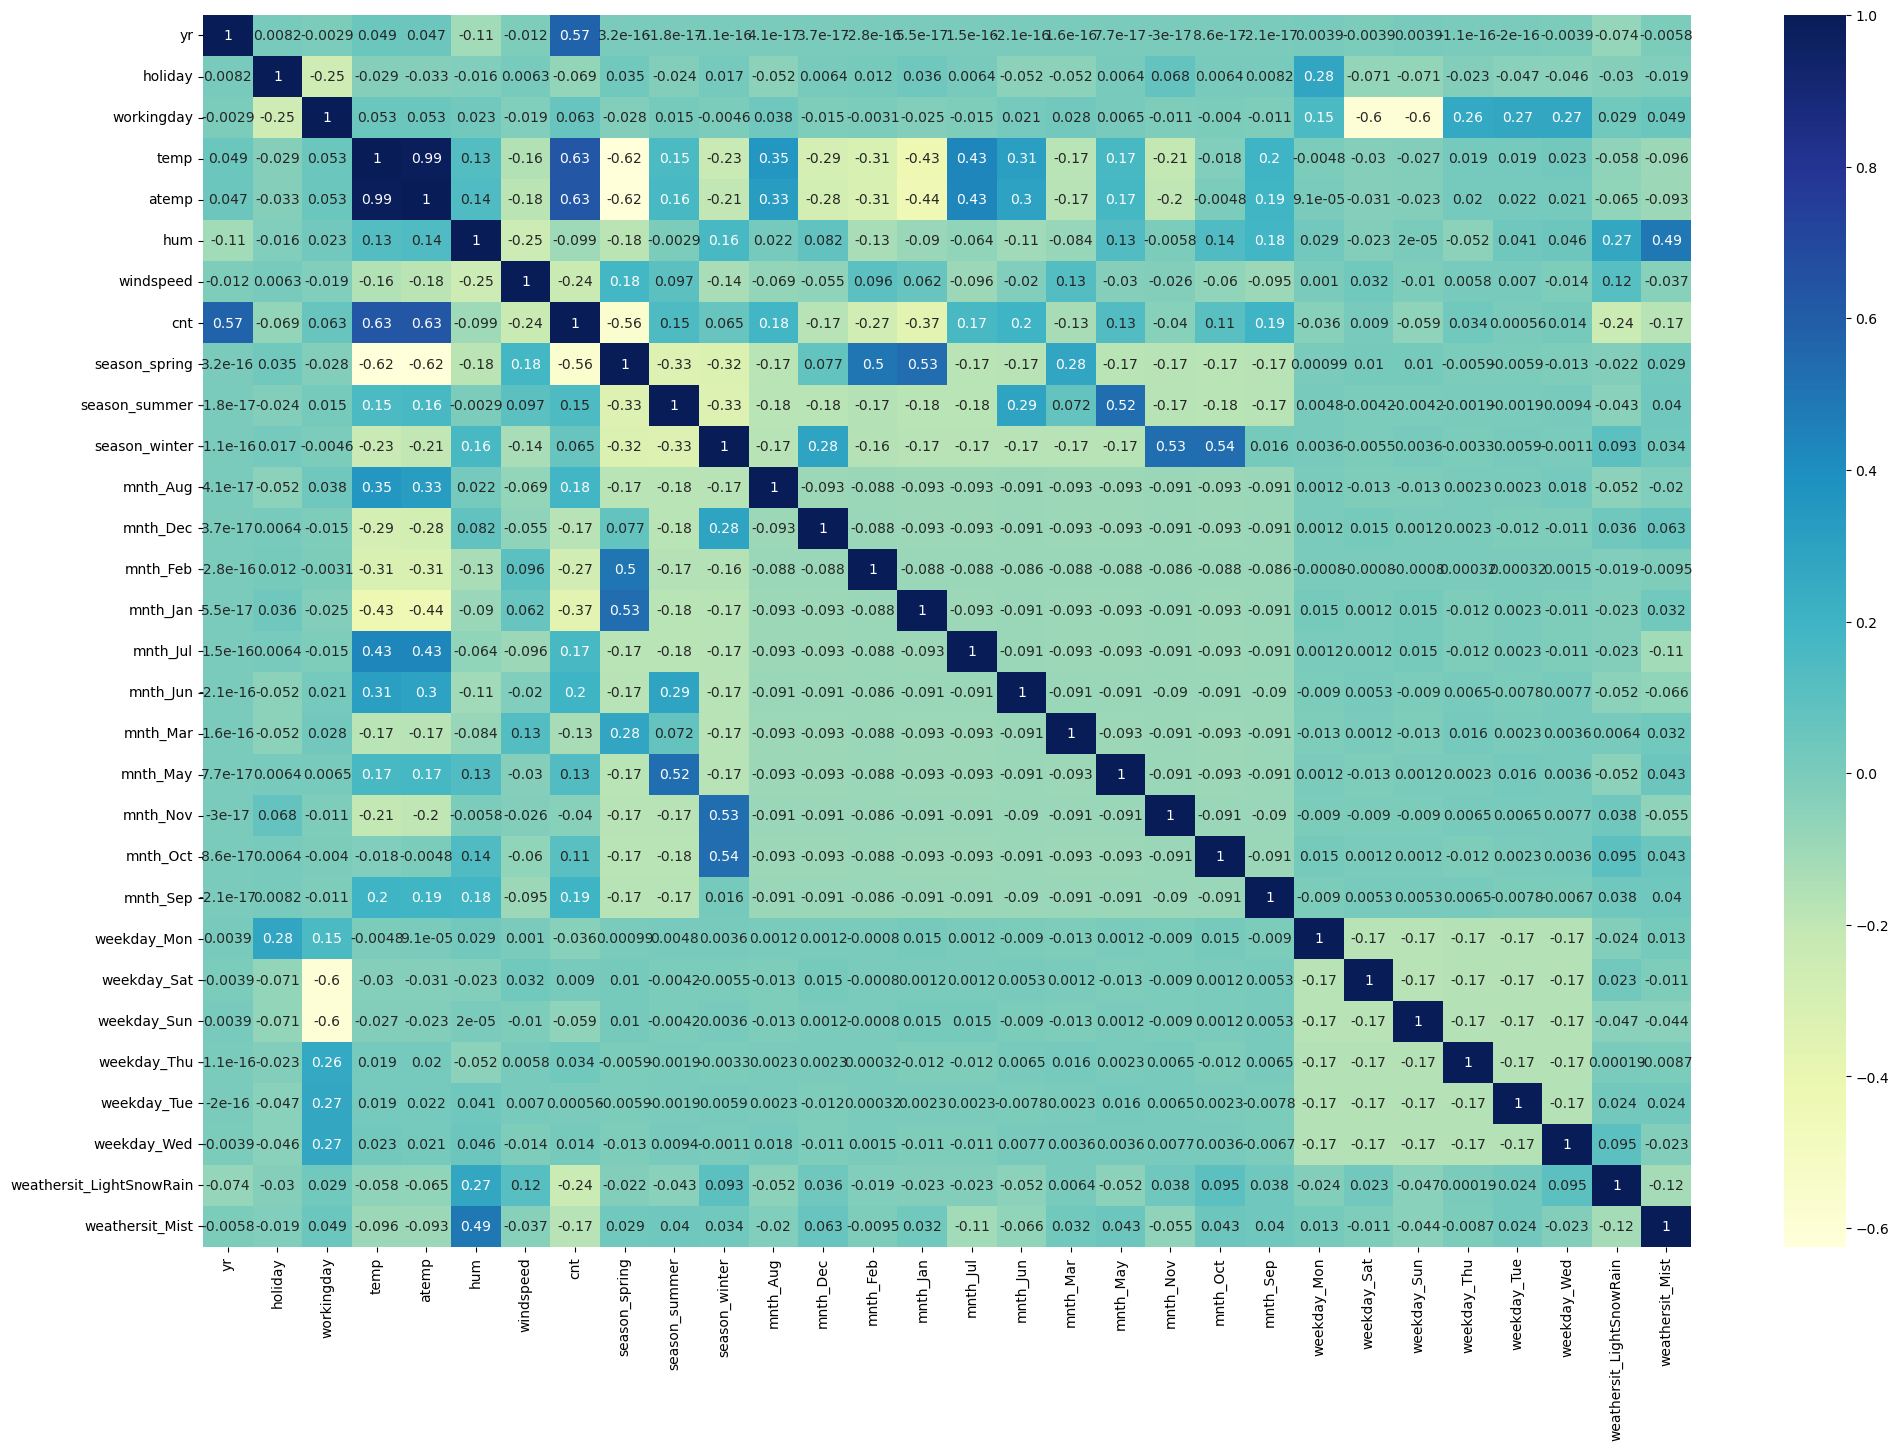

In [20]:
plt.figure(figsize = (24, 16))
sns.heatmap(data=bikedata.corr(), annot=True, cmap='YlGnBu')
plt.show()

- Our target variable demand for bikes `cnt` seems to have a hight correlation with `tmp` or `atemp` and `yr`

<a id="splitting-the-data" > </a>
## Step 5: Splitting the data into training & test sets

- Splitting the data into train and test sets using standard 70:30 distribution

In [21]:
from sklearn.model_selection import train_test_split

# Specifying the random state to 100, so that the training and test data always have the same rows no matter how many times we run
np.random.seed(0)

bikedata_train, bikedata_test = train_test_split(bikedata, train_size=0.7, test_size=0.3,random_state=100)
print('Overall data shape is: ', bikedata.shape)
print('Train data shape is: ', bikedata_train.shape)
print('Test data shape is: ', bikedata_test.shape)

Overall data shape is:  (730, 30)
Train data shape is:  (510, 30)
Test data shape is:  (219, 30)


<a id="rescaling-features"></a> 
## Step 6: Rescaling the features

- Rescaling the features to bring all the features on a common scale.
- Using min-max scaler for this exercise
- This is being done only on original numeric variables and not on the dummy variables as they already have 0 and 1 notation
- Using fit and transform on training data and only transform on test data so as to ensure that model doesn't learn any patterns on test data

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
# We already have list of numeric variables from one of the earlier steps
# Reusing the same to apply scaling using fit transform for training data

bikedata_train[numeric_variables] = scaler.fit_transform(bikedata_train[numeric_variables])
bikedata_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnowRain,weathersit_Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


<a id='feature-selection'> </a>
## Step 7: Feature Selection

Here is the approach taken / steps followed:
- We have 30 columns in total of which 29 are predictor variables and the remaining one is a target variable
- As manual recursive feature elimination with 30 columns is tideous and time taking, we will use RFE from sklearn to pick top 15 variables there by elimination 14.
- From there, we will try to manually eliminate features one by one till we get an optimal one 

**Dividing into X and y sets**

In [24]:
y_train = bikedata_train['cnt']
X_train = bikedata_train.drop(columns='cnt')
print('y_train shape is: ', y_train.shape)
print('X_train shape is: ', X_train.shape)
X_train.head()

y_train shape is:  (510,)
X_train shape is:  (510, 29)


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnowRain,weathersit_Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


### RFE

In [25]:
# Importing RFE and linear regression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [26]:
# Running RFE keeping the desired number of features / predictor variables to 15 so that we can take manual approach from there
bikedata_lm_sk = LinearRegression()
bikedata_lm_sk.fit(X_train, y_train)
#print('Coefficients are: ', bikedata_lm_sk.coef_)
#print('Intercept is: ', bikedata_lm_sk.intercept_)

bikedata_rfe = RFE(bikedata_lm_sk, n_features_to_select=15)
bikedata_rfe = bikedata_rfe.fit(X_train, y_train)

In [27]:
# Viewing the list of columns and their RFE support and RFE rankings
list (zip(X_train.columns, bikedata_rfe.support_, bikedata_rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 5),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 15),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 14),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 10),
 ('weathersit_LightSnowRain', True, 1),
 ('weathersit_Mist', True, 1)]

- Picking the top 15 columns specified by RFE and continuing with our model building

In [28]:
rfe_support_cols = X_train.columns[bikedata_rfe.support_]
rfe_support_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weathersit_LightSnowRain',
       'weathersit_Mist'],
      dtype='object')

<a id='model-building'> </a>
## Step 8: Model Building

**Using statsmodel for detailed summary of statistics**

In [29]:
# Importing statsmodel
import statsmodels.api as sm

In [30]:
# Picking only columns selected by RFE for our base model
X_train_rfe = X_train[rfe_support_cols]
X_train_rfe.shape

(510, 15)

In [31]:
# Adding constant as statsmodels doesn't consider intercept and tries to build model passing through origin
X_train_rfe_sm = sm.add_constant(X_train_rfe)
X_train_rfe_sm.shape

(510, 16)

In [32]:
# Running the linear model
bikedata_lm_sm = sm.OLS(endog=y_train, exog= X_train_rfe_sm).fit()

In [33]:
# Verifying the summary of the model we built
bikedata_lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.31e-191
Time:                        17:10:40   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2510      0.036      6.949      0.000       0.180       0.322
yr                           0.2305      0.008     28.807      0.000       0.215       0.246
holiday                     -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                   0.0435      0.012      3.781      0.000       0.021       0.066
temp                         0.5098      0.034     14.851      0.000       0.442       0.577
hum                         -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                   -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring               -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer                0.0497      0.015      3.346      0.001       0.020       0.079
season_winter                0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan                    -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul                    -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep                     0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Sat                  0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_LightSnowRain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
weathersit_Mist             -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-Squared seems to be decent enough
- All the predictor variables seem to have p-value less than the threshold (0.05) indicating that all of them might be statistically significant.
- We will try to observe the VIF as well as it gives correlation among the feature variables and see if any of the predictor variables have high correlation among them

In [34]:
# Importing from statsmodels to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
# Create a dataframe with all feature variables and determine vIF's for them
vif_1 = pd.DataFrame()
vif_1['Features'] = X_train_rfe_sm.columns
vif_1['VIF'] = [variance_inflation_factor(X_train_rfe_sm.values, i ) for i in range(X_train_rfe_sm.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by='VIF', ascending=False)
vif_1

,Features,VIF
0,const,84.59
7,season_spring,5.08
4,temp,3.89
9,season_winter,3.60
8,season_summer,2.64
5,hum,1.92
3,workingday,1.88
13,weekday_Sat,1.78
10,mnth_Jan,1.57
15,weathersit_Mist,1.57


**Key Observations:**
- Only `mnth_Jan` variable has a p-value close enough to our threshold 0.05, but it is still less than that
- Among VIF scores, `season_spring` has VIF greater than 5.
- As none of the variables have p-value greater than threshold, we will drop the `season_spring` variable as it has VIF greater than 5 indicating that it has high correlation with other variables
- We will build the model again after dropping `season_spring` column and compare the R-Squared and Adjusted R-Squared metrics

### Building second model after dropping `season_spring` predictor variable

In [36]:
# Dropping spring variable

X_train_rfe = X_train[rfe_support_cols]
X_train_rfe = X_train_rfe.drop(columns='season_spring')
X_train_rfe.shape

(510, 14)

In [37]:
# Adding constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)
print('X_train_rfe_sm shape is: ', X_train_rfe_sm.shape)

X_train_rfe_sm shape is:  (510, 15)


In [38]:
# Running the model
bikedata_lm_sm = sm.OLS(endog=y_train, exog=X_train_rfe_sm).fit()

# Verifying the summary
bikedata_lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.24e-191
Time:                        17:10:40   Log-Likelihood:                 516.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2003      0.030      6.717      0.000       0.142       0.259
yr                           0.2294      0.008     28.567      0.000       0.214       0.245
holiday                     -0.0600      0.027     -2.220      0.027      -0.113      -0.007
workingday                   0.0439      0.012      3.793      0.000       0.021       0.067
temp                         0.5677      0.025     22.572      0.000       0.518       0.617
hum                         -0.1643      0.037     -4.402      0.000      -0.238      -0.091
windspeed                   -0.1932      0.025     -7.597      0.000      -0.243      -0.143
season_summer                0.0746      0.011      6.836      0.000       0.053       0.096
season_winter                0.1266      0.011     11.208      0.000       0.104       0.149
mnth_Jan                    -0.0392      0.017     -2.261      0.024      -0.073      -0.005
mnth_Jul                    -0.0445      0.018     -2.503      0.013      -0.079      -0.010
mnth_Sep                     0.0926      0.016      5.836      0.000       0.061       0.124
weekday_Sat                  0.0540      0.015      3.709      0.000       0.025       0.083
weathersit_LightSnowRain    -0.2446      0.026     -9.373      0.000      -0.296      -0.193
weathersit_Mist             -0.0556      0.010     -5.355      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       60.777   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.515
Skew:                          -0.658   Prob(JB):                     1.68e-29
Kurtosis:                       5.122   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Key metrics such as R-squared and Adjusted R-squared have only negligible dip in values after dropping the `season_spring` variable
- All the predictor variables have zero p-values except `holiday`, `mnth_Jan` and `mnth_Jul`. Even these are having less than the threshold of 0.05
- We will again observe VIF of all the remaining predictor / feature variables

In [39]:
# Create a dataframe with all feature variables and determine vIF's for them
vif_2 = pd.DataFrame()
vif_2['Features'] = X_train_rfe_sm.columns
vif_2['VIF'] = [variance_inflation_factor(X_train_rfe_sm.values, i ) for i in range(X_train_rfe_sm.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'], 2)
vif_2 = vif_2.sort_values(by='VIF', ascending=False)
vif_2

,Features,VIF
0,const,57.07
4,temp,2.07
5,hum,1.90
3,workingday,1.88
12,weekday_Sat,1.78
14,weathersit_Mist,1.56
9,mnth_Jan,1.55
8,season_winter,1.53
10,mnth_Jul,1.43
7,season_summer,1.41


**Key Observations**
- VIF values for all the remaining predictor variables is less than 5
- p-values of all the remaining predictor variables is less than the threshold of 0.05 except the three variables `holiday`, `mnth_Jan` and `mnth_Jul`.
- Out of the three predictor variables having non-zero p-values, `holiday` has the highest p-value. So we will drop that `holiday` variable and verify the metrics to see if it significantly affects our model when dropped

### Building third model after dropping `season_spring`  & `holiday` predictor variables

In [40]:
# Dropping holiday variable

X_train_rfe = X_train[rfe_support_cols]
X_train_rfe = X_train_rfe.drop(columns=['season_spring','holiday'])
X_train_rfe.shape

(510, 13)

In [41]:
# Adding constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)
print('X_train_rfe_sm shape is: ', X_train_rfe_sm.shape)

X_train_rfe_sm shape is:  (510, 14)


In [42]:
# Running the model
bikedata_lm_sm = sm.OLS(endog=y_train, exog=X_train_rfe_sm).fit()

# Verifying the summary
bikedata_lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.53e-191
Time:                        17:10:40   Log-Likelihood:                 514.25
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1899      0.030      6.422      0.000       0.132       0.248
yr                           0.2296      0.008     28.484      0.000       0.214       0.245
workingday                   0.0528      0.011      4.850      0.000       0.031       0.074
temp                         0.5686      0.025     22.521      0.000       0.519       0.618
hum                         -0.1627      0.037     -4.344      0.000      -0.236      -0.089
windspeed                   -0.1940      0.026     -7.600      0.000      -0.244      -0.144
season_summer                0.0754      0.011      6.884      0.000       0.054       0.097
season_winter                0.1261      0.011     11.126      0.000       0.104       0.148
mnth_Jan                    -0.0399      0.017     -2.296      0.022      -0.074      -0.006
mnth_Jul                    -0.0432      0.018     -2.419      0.016      -0.078      -0.008
mnth_Sep                     0.0907      0.016      5.703      0.000       0.059       0.122
weekday_Sat                  0.0631      0.014      4.493      0.000       0.035       0.091
weathersit_LightSnowRain    -0.2438      0.026     -9.305      0.000      -0.295      -0.192
weathersit_Mist             -0.0553      0.010     -5.304      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.500   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.550
Skew:                          -0.703   Prob(JB):                     1.01e-34
Kurtosis:                       5.321   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Key metrics such as R-squared and Adjusted R-squared have only negligible dip in values after dropping the `holiday` and `season_spring` variables
- All the predictor variables have zero p-values except `mnth_Jan` and `mnth_Jul`. Even these are having less than the threshold of 0.05
- We will again observe VIF of all the remaining predictor / feature variables

In [43]:
# Create a dataframe with all feature variables and determine vIF's for them
vif_3 = pd.DataFrame()
vif_3['Features'] = X_train_rfe_sm.columns
print('X_train_rfe_sm shape is: ', X_train_rfe_sm.shape)
vif_3['VIF'] = [variance_inflation_factor(X_train_rfe_sm.values, i ) for i in range(X_train_rfe_sm.shape[1])]
vif_3['VIF'] = round(vif_3['VIF'], 2)
vif_3 = vif_3.sort_values(by='VIF', ascending=False)
print('vif_3 shape is: ', vif_3.shape)
vif_3

X_train_rfe_sm shape is:  (510, 14)
vif_3 shape is:  (14, 2)


,Features,VIF
0,const,55.66
3,temp,2.06
4,hum,1.90
2,workingday,1.65
11,weekday_Sat,1.64
13,weathersit_Mist,1.56
8,mnth_Jan,1.55
7,season_winter,1.53
9,mnth_Jul,1.43
6,season_summer,1.41


**Key Observations**
- VIF values for all the remaining predictor variables is less than 5
- p-values of all the remaining predictor variables is less than the threshold of 0.05 except `mnth_Jan` and `mnth_Jul`.
- Out of `mnth_Jan` and `mnth_Jul` variables which are having non-zero p-values, `mnth_Jan` has the highest p-value. So we will drop that `mnth_Jan` variable and verify the metrics to see if it significantly affects our model when dropped

### Building fourth model after dropping `season_spring`  & `holiday` & `mnth_Jan` predictor variables

In [44]:
# Dropping Jan variable

X_train_rfe = X_train[rfe_support_cols]
X_train_rfe = X_train_rfe.drop(columns=['season_spring','holiday','mnth_Jan'])
X_train_rfe.shape

(510, 12)

In [45]:
# Adding constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)
print('X_train_rfe_sm shape is: ', X_train_rfe_sm.shape)

X_train_rfe_sm shape is:  (510, 13)


In [46]:
# Running the model
bikedata_lm_sm = sm.OLS(endog=y_train, exog=X_train_rfe_sm).fit()

# Verifying the summary
bikedata_lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.26e-191
Time:                        17:10:40   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1705      0.028      5.991      0.000       0.115       0.226
yr                           0.2286      0.008     28.280      0.000       0.213       0.244
workingday                   0.0527      0.011      4.816      0.000       0.031       0.074
temp                         0.5960      0.022     26.678      0.000       0.552       0.640
hum                         -0.1693      0.038     -4.514      0.000      -0.243      -0.096
windspeed                   -0.1885      0.026     -7.386      0.000      -0.239      -0.138
season_summer                0.0815      0.011      7.650      0.000       0.061       0.102
season_winter                0.1365      0.010     13.067      0.000       0.116       0.157
mnth_Jul                    -0.0442      0.018     -2.467      0.014      -0.079      -0.009
mnth_Sep                     0.0926      0.016      5.804      0.000       0.061       0.124
weekday_Sat                  0.0627      0.014      4.446      0.000       0.035       0.090
weathersit_LightSnowRain    -0.2404      0.026     -9.152      0.000      -0.292      -0.189
weathersit_Mist             -0.0551      0.010     -5.261      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       65.490   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.563
Skew:                          -0.687   Prob(JB):                     2.02e-33
Kurtosis:                       5.280   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Key metrics such as R-squared and Adjusted R-squared have only negligible dip in values after dropping the `holiday` and `season_spring` and `mnth_Jan` variables
- All the predictor variables have zero p-values except `mnth_Jul`. Even these are having less than the threshold of 0.05
- We will again observe VIF of all the remaining predictor / feature variables

In [47]:
# Create a dataframe with all feature variables and determine vIF's for them
vif_4 = pd.DataFrame()
vif_4['Features'] = X_train_rfe_sm.columns
print('X_train_rfe_sm shape is: ', X_train_rfe_sm.shape)
vif_4['VIF'] = [variance_inflation_factor(X_train_rfe_sm.values, i ) for i in range(X_train_rfe_sm.shape[1])]
vif_4['VIF'] = round(vif_4['VIF'], 2)
vif_4 = vif_4.sort_values(by='VIF', ascending=False)
print('vif_4 shape is: ', vif_4.shape)
vif_4

X_train_rfe_sm shape is:  (510, 13)
vif_4 shape is:  (13, 2)


,Features,VIF
0,const,51.12
4,hum,1.89
2,workingday,1.65
10,weekday_Sat,1.64
3,temp,1.60
12,weathersit_Mist,1.56
8,mnth_Jul,1.43
6,season_summer,1.33
7,season_winter,1.29
11,weathersit_LightSnowRain,1.24


**Key Observations**
- VIF values for all the remaining predictor variables is less than 5
- p-values of all the remaining predictor variables is less than the threshold of 0.05 except `mnth_Jul`.
- So we will drop that `mnth_Jul` variable and verify the metrics to see if it significantly affects our model when dropped

### Building fifth model after dropping `season_spring`  & `holiday` & `mnth_Jan` &`mnth_Jul` predictor variables

In [48]:
# Dropping Jul variable

X_train_rfe = X_train[rfe_support_cols]
X_train_rfe = X_train_rfe.drop(columns=['season_spring','holiday','mnth_Jan','mnth_Jul'])
X_train_rfe.shape

(510, 11)

In [49]:
# Adding constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)
print('X_train_rfe_sm shape is: ', X_train_rfe_sm.shape)

X_train_rfe_sm shape is:  (510, 12)


In [50]:
# Running the model
bikedata_lm_sm = sm.OLS(endog=y_train, exog=X_train_rfe_sm).fit()

# Verifying the summary
bikedata_lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.89e-191
Time:                        17:10:41   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1698      0.029      5.937      0.000       0.114       0.226
yr                           0.2294      0.008     28.272      0.000       0.213       0.245
workingday                   0.0536      0.011      4.875      0.000       0.032       0.075
temp                         0.5709      0.020     28.559      0.000       0.532       0.610
hum                         -0.1613      0.038     -4.295      0.000      -0.235      -0.087
windspeed                   -0.1861      0.026     -7.259      0.000      -0.236      -0.136
season_summer                0.0899      0.010      8.859      0.000       0.070       0.110
season_winter                0.1407      0.010     13.575      0.000       0.120       0.161
mnth_Sep                     0.1025      0.016      6.610      0.000       0.072       0.133
weekday_Sat                  0.0630      0.014      4.450      0.000       0.035       0.091
weathersit_LightSnowRain    -0.2439      0.026     -9.250      0.000      -0.296      -0.192
weathersit_Mist             -0.0553      0.011     -5.255      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       72.653   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.950
Skew:                          -0.754   Prob(JB):                     3.39e-37
Kurtosis:                       5.372   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Key metrics such as R-squared and Adjusted R-squared have only negligible dip in values after dropping all the predictor variables which have non-zero p-values
- We will again observe VIF of all the remaining predictor / feature variables

In [51]:
# Create a dataframe with all feature variables and determine VIF's for them
vif_5 = pd.DataFrame()
vif_5['Features'] = X_train_rfe_sm.columns
print('X_train_rfe_sm shape is: ', X_train_rfe_sm.shape)
vif_5['VIF'] = [variance_inflation_factor(X_train_rfe_sm.values, i ) for i in range(X_train_rfe_sm.shape[1])]
vif_5['VIF'] = round(vif_5['VIF'], 2)
vif_5 = vif_5.sort_values(by='VIF', ascending=False)
print('vif_5 shape is: ', vif_5.shape)
vif_5

X_train_rfe_sm shape is:  (510, 12)
vif_5 shape is:  (12, 2)


,Features,VIF
0,const,51.12
4,hum,1.87
2,workingday,1.65
9,weekday_Sat,1.64
11,weathersit_Mist,1.56
3,temp,1.27
7,season_winter,1.25
10,weathersit_LightSnowRain,1.24
6,season_summer,1.19
5,windspeed,1.18


**Key Observations**
- VIF values for all the remaining predictor variables is less than 5
- p-values of all the remaining predictor variables is zero.
- So we may stop this recursive feature elimination process as all of them are statistically significant and have VIF values less than the threshold, we are not sure if the model can be simiplified further or we can go ahead with this model. 
- So let's observe how each of the remaining predictor variables are correlated with the target variable to see if it gives any insights

**Observing the correlation coefficients of remaining predictor variables with target variable:**

In [52]:
#Picking the original training data for this
print('bike data training set shape is: ',bikedata_train.shape)

bike data training set shape is:  (510, 30)


In [53]:
# Picking only the predictor variables we used in the current iteration of the model
train_data_corr_current_model = bikedata_train[X_train_rfe.columns]
print('train_data_corr_current_model shape is: ', train_data_corr_current_model.shape)
train_data_corr_current_model.columns

train_data_corr_current_model shape is:  (510, 11)


Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Sep', 'weekday_Sat', 'weathersit_LightSnowRain',
       'weathersit_Mist'],
      dtype='object')

In [54]:
# Adding back the target variable to the above one
train_data_corr_current_model = pd.concat([train_data_corr_current_model, bikedata_train['cnt']], axis = 1)
print('train_data_corr_current_model shape is: ', train_data_corr_current_model.shape)
train_data_corr_current_model.columns

train_data_corr_current_model shape is:  (510, 12)


Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Sep', 'weekday_Sat', 'weathersit_LightSnowRain',
       'weathersit_Mist', 'cnt'],
      dtype='object')

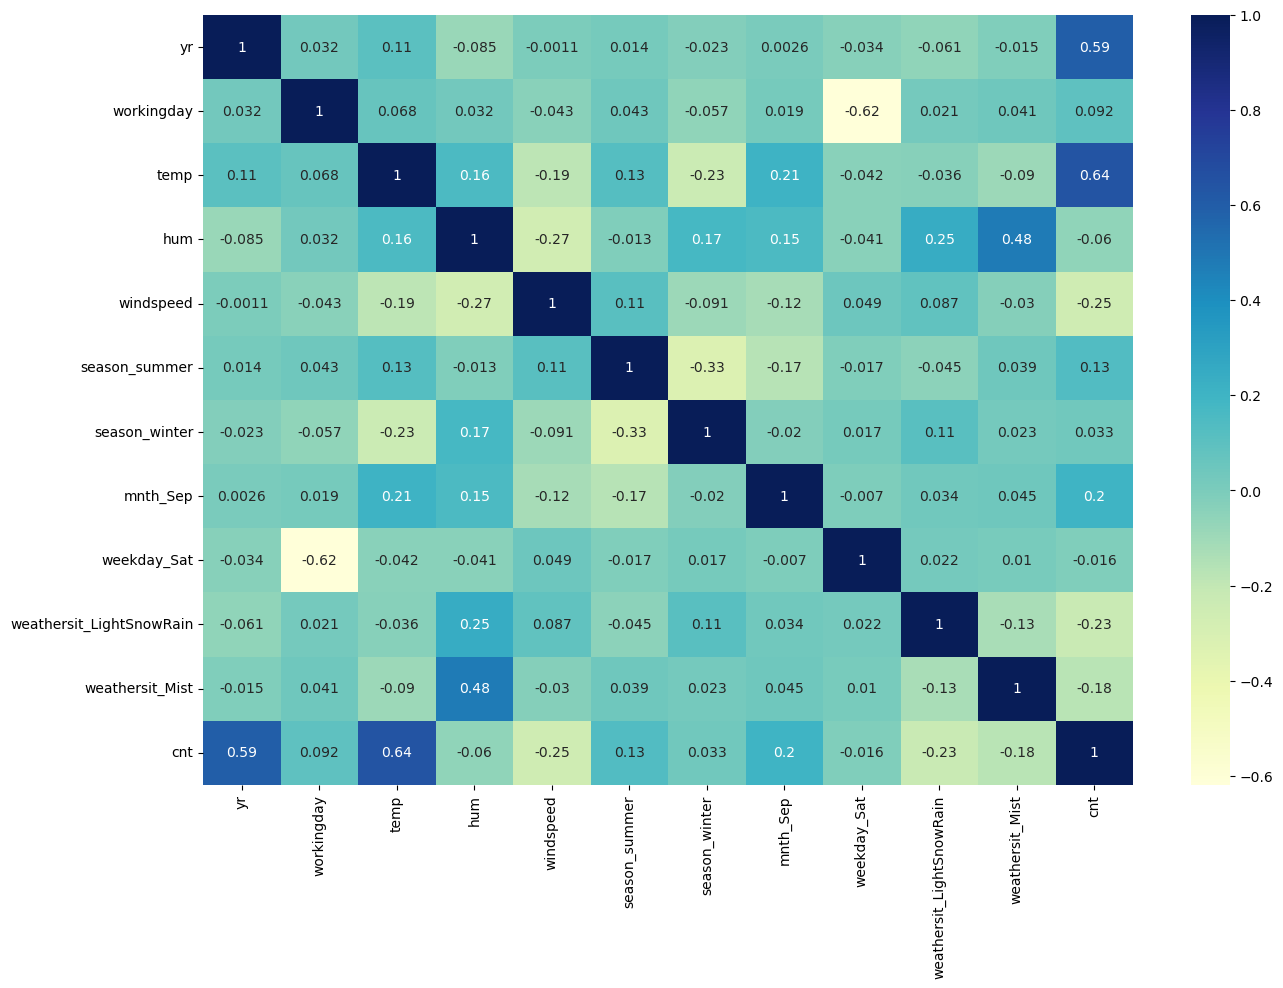

In [55]:
# Heatmap with the correlation coefficients
plt.figure(figsize = (15, 10))
sns.heatmap(data=train_data_corr_current_model.corr(), annot=True, cmap='YlGnBu' )
plt.show()

In [56]:
# Observing the correlation coefficients in descending order only with target variable
train_data_cnt_corr = train_data_corr_current_model.corr()['cnt']
train_data_cnt_corr.abs().sort_values(ascending=False)

cnt                         1.000000
temp                        0.643517
yr                          0.591508
windspeed                   0.253794
weathersit_LightSnowRain    0.226598
mnth_Sep                    0.201327
weathersit_Mist             0.175530
season_summer               0.134343
workingday                  0.092320
hum                         0.059993
season_winter               0.032636
weekday_Sat                 0.016215
Name: cnt, dtype: float64

Below are our observations:
- Predictor variable `weekday_Sat` has very least correlation coefficient with the target variable `cnt` which is demand for bikes 
- We will remove this variable and build model and verify the metrics to see if it significantly affects metrics or will the model be further simplified

### Building sixth model after dropping `season_spring`  & `holiday` & `mnth_Jan` &`mnth_Jul` & `weekday_Sat` predictor variables

In [57]:
# Dropping Jul variable

X_train_rfe = X_train[rfe_support_cols]
X_train_rfe = X_train_rfe.drop(columns=['season_spring','holiday','mnth_Jan','mnth_Jul','weekday_Sat'])
X_train_rfe.shape

(510, 10)

In [58]:
# Adding constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)
print('X_train_rfe_sm shape is: ', X_train_rfe_sm.shape)

X_train_rfe_sm shape is:  (510, 11)


In [59]:
# Running the model
bikedata_lm_sm = sm.OLS(endog=y_train, exog=X_train_rfe_sm).fit()

# Verifying the summary
bikedata_lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.2
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.82e-188
Time:                        17:10:42   Log-Likelihood:                 498.50
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     499   BIC:                            -928.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2060      0.028      7.375      0.000       0.151       0.261
yr                           0.2286      0.008     27.661      0.000       0.212       0.245
workingday                   0.0232      0.009      2.644      0.008       0.006       0.040
temp                         0.5730      0.020     28.145      0.000       0.533       0.613
hum                         -0.1740      0.038     -4.562      0.000      -0.249      -0.099
windspeed                   -0.1859      0.026     -7.121      0.000      -0.237      -0.135
season_summer                0.0902      0.010      8.719      0.000       0.070       0.110
season_winter                0.1402      0.011     13.285      0.000       0.119       0.161
mnth_Sep                     0.1032      0.016      6.532      0.000       0.072       0.134
weathersit_LightSnowRain    -0.2350      0.027     -8.774      0.000      -0.288      -0.182
weathersit_Mist             -0.0513      0.011     -4.799      0.000      -0.072      -0.030
==============================================================================
Omnibus:                       62.630   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.956
Skew:                          -0.630   Prob(JB):                     8.27e-35
Kurtosis:                       5.408   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Key metrics such as R-squared and Adjusted R-squared have only negligible dip in values after dropping all the predictor variables which have non-zero p-values
- We will again observe VIF of all the remaining predictor / feature variables

In [60]:
# Create a dataframe with all feature variables and determine VIF's for them
vif_6 = pd.DataFrame()
vif_6['Features'] = X_train_rfe_sm.columns
print('X_train_rfe_sm shape is: ', X_train_rfe_sm.shape)
vif_6['VIF'] = [variance_inflation_factor(X_train_rfe_sm.values, i ) for i in range(X_train_rfe_sm.shape[1])]
vif_6['VIF'] = round(vif_6['VIF'], 2)
vif_6 = vif_6.sort_values(by='VIF', ascending=False)
print('vif_6 shape is: ', vif_6.shape)
vif_6

X_train_rfe_sm shape is:  (510, 11)
vif_6 shape is:  (11, 2)


,Features,VIF
0,const,46.98
4,hum,1.86
10,weathersit_Mist,1.55
3,temp,1.27
7,season_winter,1.25
9,weathersit_LightSnowRain,1.23
6,season_summer,1.19
5,windspeed,1.18
8,mnth_Sep,1.11
1,yr,1.03


**Key Observations**:
- We are now left with 10 predictor variables and all of them have zero p-values and acceptable VIF values
- We can go even simplifying the model by dropping the predictor variable which is least related to target variable among the remaining and then verify the impact of dropped variable on the metrics.
- But we will stop this exercise at this stage and continue evaluating the model with 10 predictor variables on test data and validate the results

<a id='residual-analysis'> </a>
## Step 9: Residual Analysis on the training data

**This step is basically to make sure that all our assumptions regarding linear regression model holds good**
We will basically verify the below
- Verify if the residuals or error terms are normally distributed or not
- Verify if the error terms are independent of one another or if there is any visible pattern among the error terms
- Verify if the error terms have constant variance among them

In [61]:
y_train_pred_cnt = bikedata_lm_sm.predict(X_train_rfe_sm)

In [62]:
#sns.displot?

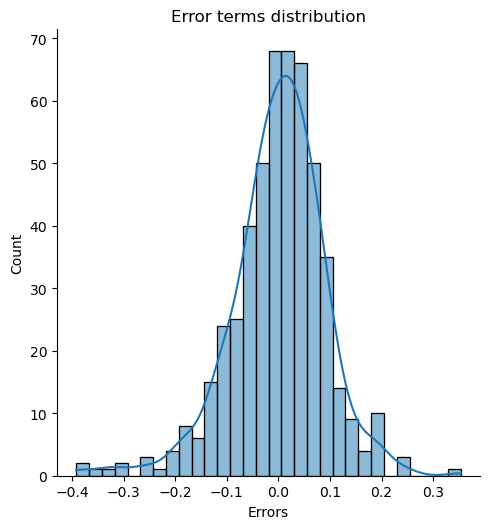

In [63]:
# Plot the histogram of error terms to verify if the error terms are normally distributed or not.
sns.displot( (y_train - y_train_pred_cnt), kde=True)
plt.title('Error terms distribution')
plt.xlabel('Errors')
plt.show()

- Our assumption regarding normal distribution of error terms hold good.
- Let's validate the other assumption regarding error terms are independent of one another

In [64]:
# Plotting a Q-Q plot
#help(sm.qqplot)

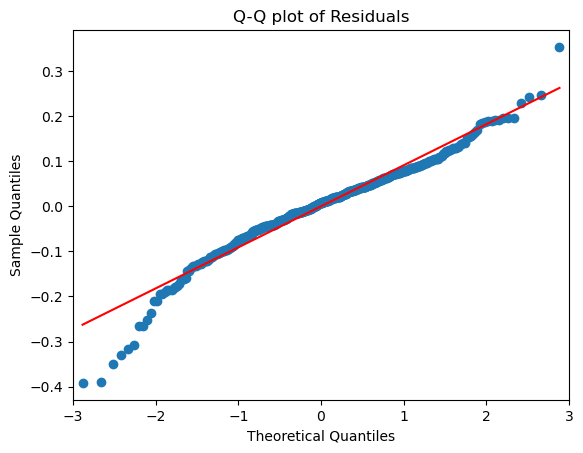

In [65]:
sm.qqplot(data=(y_train - y_train_pred_cnt), line='s', ax=plt.gca())
plt.title('Q-Q plot of Residuals')
plt.show()

- Except for the bottom ones, the residuals closely follow the straight line 

**Looking for patterns in the residuals / error terms**
- For this, we will plot a scatter plot with residual values against y_train values

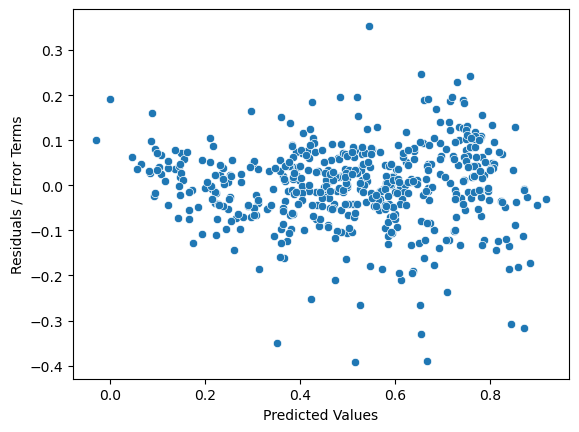

In [66]:
#sns.scatterplot?
sns.scatterplot(x=y_train_pred_cnt, y= (y_train - y_train_pred_cnt))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals / Error Terms')
plt.show()

- We don't see any clear patterns among the residuals

<a id='model-evaluation'> </a>
## Step 10: Model Evaluation on test data

Before evaluating the model on test data, we need to do the following
- Scale the test data using the same scale that is used on training data
- In test data, retain only the predictor variables used in our final model and drop others 

In [67]:
# Our intention is to apply scaling only the original numeric variables and not on the dummies
# We already have list of numeric variables from one of the earlier steps
# As we need to scale test data using the same scale used on training data, we will use only transform and not fit transform
print('Original numeric variables are: ', numeric_variables)
bikedata_test[numeric_variables] = scaler.transform(bikedata_test[numeric_variables])
print('Test data shape is: ', bikedata_test.shape)
bikedata_test.head()

Original numeric variables are:  ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
Test data shape is:  (219, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnowRain,weathersit_Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [68]:
# Verifying the test data after scaling
bikedata_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnowRain,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
# List the columns used by our final model
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Sep', 'weathersit_LightSnowRain',
       'weathersit_Mist'],
      dtype='object')

**Dividing into X_test and y_test with only the variables used in our final model**

In [70]:
y_test = bikedata_test['cnt']
print('y_test shape is: ', y_test.shape)
X_test = bikedata_test[X_train_rfe.columns]
print('X_test shape is: ', X_test.shape)

y_test shape is:  (219,)
X_test shape is:  (219, 10)


In [71]:
# Adding constant on X_test
X_test_sm = sm.add_constant(X_test)

**Predicting bike demand on test data**

In [72]:
y_test_pred = bikedata_lm_sm.predict(X_test_sm)

<a id="r-sq-metrics"> </a>
**Calculating r-squared metrics on training data and test data**

In [73]:
from sklearn.metrics import r2_score

In [74]:
#r2_score?

In [75]:
# Determine r-squared value for training data
r2_score_train = r2_score(y_train, y_train_pred_cnt)
print('Train r2 score is: ', r2_score_train)

Train r2 score is:  0.8353443109027985


In [76]:
# Determine r-squared value for test data
r2_score_test = r2_score(y_test, y_test_pred)
print('Test r2 score is: ', r2_score_test)

Test r2 score is:  0.8022212644242877


In [77]:
# Print the final model parameters and their slope coefficients
print(bikedata_lm_sm.params)

const                       0.206027
yr                          0.228613
workingday                  0.023184
temp                        0.572953
hum                        -0.174030
windspeed                  -0.185929
season_summer               0.090154
season_winter               0.140207
mnth_Sep                    0.103222
weathersit_LightSnowRain   -0.234995
weathersit_Mist            -0.051263
dtype: float64


**Final Observations from our model:**
- We got r2 score of 0.835 on training data and 0.802 on test data with 10 predictor variables
- Below are the predictor variables used in our final model after RFE and manual feature elimination based on p-values & VIF values
    - `yr`, `workingday`, `temp`, `hum`, `windspeed`, `season_summer`, `season_winter`, `mnth_Sep`, `weathersit_LightSnowRain`, `weathersit_Mist`
- Equation of best fitted line based on the final summary we have

$ cnt = 0.2286 \times   yr   + 0.0232 \times workingday + 0.5730 \times temp + (-0.1743 \times hum) + (-0.1859 * windspeed) + 0.09 \times seasonsummer + 0.140 \times seasonwinter + 0.103 \times mnthSep + (-0.2349 \times weathersitLightSnowRain) + (-0.051 \times weathersitMist)$